In [1]:
#notebook to find full eigenfunctions

#first get the transverse eigenfunctions




In [3]:
from scipy.integrate import solve_bvp
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.ticker import LinearLocator
from matplotlib.colors import TwoSlopeNorm

import scipy as scipy

from scipy.integrate import odeint
from scipy.interpolate import CubicSpline

from python_profile_code.ode_theta import ODE_theta

from python_profile_code.react import react_prime

from python_profile_code.parameters import vstar, l

from python_profile_code.find_roots import find_roots

from python_profile_code.find_zero import find_zero

import os

from python_profile_code.get_delta_theta import get_delta_theta

from python_profile_code.get_solutions import get_solutions

In [15]:
L=100
num_plot_vals=400
plotting_range=np.linspace(-L,L,num_plot_vals)

alpha_x=0.0;
alpha_y=0.0;

beta_y=0;


In [25]:
alpha_y

0.0

0
success!
1
success!
2
success!
3
success!
4
success!


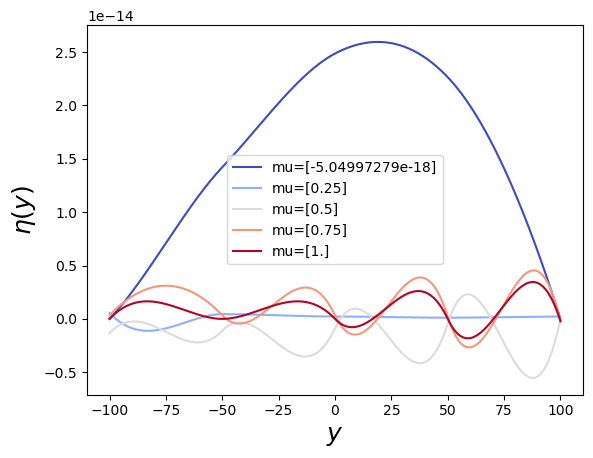

In [27]:
#####################TRANSVERSE EIGENFUNCTION########################


#potential function
def gamma(x,alpha,beta): return (alpha*beta/2)*(1/np.cosh(beta*x))**2-((alpha**2)/4)*(np.tanh(beta*x))**2

def wind(x,alpha,beta): return alpha #*np.tanh(beta*x)
# the ODE function: mu is the eigenvalue
def ODE(x,y,p):
    mu=p[0];
    return np.vstack((y[1], (mu-wind(x,alpha_y,beta_y))*y[0]))
    
    #[v, (mu-gamma(x,alpha,beta))*u] #3rd entry because including alpha as param?

# the boundary conditions--need a third bc if I'm including mu as a parameter

def bc(ya, yb, p):
    mu=p[0]
    return [ya[0], yb[0], ya[1]-0] 

    
    #3rd BC is that derivative is nonzero at one end at least

#define initial mesh
L=100;
res=5;
x_init = np.linspace(-L,L,res);

#define initial guess
y_init = np.ones((2,x_init.size))

c=10**(-13)

mu_guess_list=np.linspace(0,1,5)


#find eigenfunctions for transverse problem
num_vals=len(mu_guess_list)
colors=plt.cm.coolwarm(np.linspace(0.0,1.0,num_vals)) 

efunc_list=[]
for index,mu_guess in enumerate(mu_guess_list):
    print(index)
    sol = solve_bvp(ODE, bc, x_init, y_init,p=[mu_guess], max_nodes=1000000, tol=1e-8)#, verbose=2);
    mu=sol.p
    solution=sol.sol
    # print(sol.status)
    if sol.status==0 and mu != "nan": 
        print("success!")
    elif sol.status!=0:
        print("check dimensions!"+str(i))
        


    transverse_efunc=solution(plotting_range)[0]

    #plt.plot(transverse_efunc,label=("mu=" + str(mu)), color=colors[index])
    plt.plot(plotting_range,transverse_efunc,label=("mu=" + str(mu)), color=colors[index])
    efunc_list.append(transverse_efunc)
#plt.plot(plotting_range, wind(plotting_range,alpha_y,beta_y), color="black")
plt.xlabel(r"$y$",fontsize=18)
plt.ylabel(r"$\eta(y)$",fontsize=18)
#plt.title("transverse eigenfunction, alpha_y="+str(alpha_y)+ " beta_y="+str(beta_y) )
plt.savefig("transverse_efunc.pdf",format='pdf',bbox_inches='tight')
plt.legend()
plt.show()       

In [29]:
first_constant_efunc=efunc_list[0]

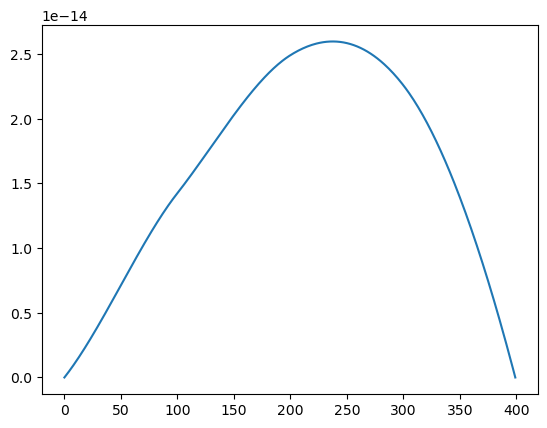

In [31]:
plt.plot(first_constant_efunc)

In [33]:
import pickle

with open('first_constant_transverse_efunc.pck', 'wb') as file_handle:
    pickle.dump(first_constant_efunc, file_handle)